In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xlrd

# Task 1: Preparing Dataset

In [2]:
xls = pd.ExcelFile('Dataset.xlsx')
df_raw = pd.read_excel(xls, 'Orders')
df_return = pd.read_excel(xls, 'Return')
df_raw

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit
0,646,CA-2017-126221,43099,43105,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110
1,907,CA-2017-143259,43099,43103,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,0.2,12.1176
2,908,CA-2017-143259,43099,43103,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,0.0,2.7279
3,909,CA-2017-143259,43099,43103,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,0.2,19.7910
4,1297,CA-2017-115427,43099,43103,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,0.2,4.5188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,41644,41651,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,0.2,4.8840
9990,740,CA-2014-112326,41643,41647,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,0.2,4.2717
9991,741,CA-2014-112326,41643,41647,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,0.2,-64.7748
9992,742,CA-2014-112326,41643,41647,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,0.8,-5.4870


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row ID       9994 non-null   int64  
 1   Order ID     9994 non-null   object 
 2   Order Date   9994 non-null   int64  
 3   Ship Date    9994 non-null   int64  
 4   Ship Mode    9994 non-null   object 
 5   Customer ID  9994 non-null   object 
 6   Channel      9994 non-null   object 
 7   Postal Code  9994 non-null   int64  
 8   Product ID   9994 non-null   object 
 9   Sales        9994 non-null   float64
 10  Quantity     9994 non-null   int64  
 11  Unit Price   9994 non-null   float64
 12  Discount     9994 non-null   float64
 13  Profit       9994 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [4]:
df_raw['Order Date'] = df_raw['Order Date'].apply(lambda x: xlrd.xldate_as_datetime(x, 0))
df_raw['Ship Date'] = df_raw['Ship Date'].apply(lambda x: xlrd.xldate_as_datetime(x, 0))

In [5]:
df_return.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [6]:
merge_df_return = df_raw.merge(df_return, how = 'left', on = 'Order ID')
df = merge_df_return[merge_df_return['Returned'] != 'Yes']
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,0.2,12.1176,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,0.0,2.7279,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,0.2,19.7910,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,0.2,-0.6048,NaN


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9194 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9194 non-null   int64         
 1   Order ID     9194 non-null   object        
 2   Order Date   9194 non-null   datetime64[ns]
 3   Ship Date    9194 non-null   datetime64[ns]
 4   Ship Mode    9194 non-null   object        
 5   Customer ID  9194 non-null   object        
 6   Channel      9194 non-null   object        
 7   Postal Code  9194 non-null   int64         
 8   Product ID   9194 non-null   object        
 9   Sales        9194 non-null   float64       
 10  Quantity     9194 non-null   int64         
 11  Unit Price   9194 non-null   float64       
 12  Discount     9194 non-null   float64       
 13  Profit       9194 non-null   float64       
 14  Returned     0 non-null      object        
dtypes: datetime64[ns](2), float64(4), int64(3), object(6)
m

# Task 2: Calculate R, F, M index

## Task 2.1: Calculate R index

In [8]:
df_r = df.groupby('Customer ID')['Order Date'].max().reset_index()
df_r

,Customer ID,Order Date
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2016-09-04
4,AB-10015,2016-11-10
...,...,...
786,XP-21865,2017-10-09
787,YC-21895,2017-12-26
788,YS-21880,2017-12-21
789,ZC-21910,2017-11-06


In [9]:
df_r['r_index'] = df_r['Order Date'].max()-df_r['Order Date']
df_r.columns = ['Customer ID', 'MaxPurchaseDate', 'Recency']
df_r

,Customer ID,MaxPurchaseDate,Recency
0,AA-10315,2017-06-29,184 days
1,AA-10375,2017-12-11,19 days
2,AA-10480,2017-04-15,259 days
3,AA-10645,2016-09-04,482 days
4,AB-10015,2016-11-10,415 days
...,...,...,...
786,XP-21865,2017-10-09,82 days
787,YC-21895,2017-12-26,4 days
788,YS-21880,2017-12-21,9 days
789,ZC-21910,2017-11-06,54 days


In [10]:
df_customer = df_r[['Customer ID', 'Recency']]

## Task 2.2: Calculate F index

In [11]:
df_f = df.groupby('Customer ID')['Order ID'].count().reset_index()
df_f.columns = ['Customer ID', 'Frequency']

In [12]:
df_customer = pd.merge(df_customer, df_f, on='Customer ID')
df_customer

,Customer ID,Recency,Frequency
0,AA-10315,184 days,11
1,AA-10375,19 days,15
2,AA-10480,259 days,12
3,AA-10645,482 days,17
4,AB-10015,415 days,6
...,...,...,...
786,XP-21865,82 days,25
787,YC-21895,4 days,7
788,YS-21880,9 days,12
789,ZC-21910,54 days,27


## Task 2.3: Calculate M index

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,0.2,12.1176,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,0.0,2.7279,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,0.2,19.7910,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,0.2,-0.6048,NaN


In [14]:
df_m = df.groupby('Customer ID')['Sales'].sum().reset_index()
df_m.columns = ['Customer ID', 'Monetary']

In [15]:
df_customer = pd.merge(df_customer, df_m, on='Customer ID')
df_customer

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,184 days,11,5563.560
1,AA-10375,19 days,15,1056.390
2,AA-10480,259 days,12,1790.512
3,AA-10645,482 days,17,5073.975
4,AB-10015,415 days,6,886.156
...,...,...,...,...
786,XP-21865,82 days,25,2110.726
787,YC-21895,4 days,7,5438.650
788,YS-21880,9 days,12,6720.444
789,ZC-21910,54 days,27,7892.998


# Task 3: Ranking each index from 1-5

## Task 3.1: Ranking R index

In [16]:
df_customer['Recency'] = -df_customer['Recency']

In [17]:
bins = ['1', '2', '3', '4', '5']
df_customer['Recency rank'] = pd.qcut(df_customer['Recency'],q = 5, labels = bins)
df_customer

,Customer ID,Recency,Frequency,Monetary,Recency rank
0,AA-10315,-184 days,11,5563.560,2
1,AA-10375,-19 days,15,1056.390,5
2,AA-10480,-259 days,12,1790.512,1
3,AA-10645,-482 days,17,5073.975,1
4,AB-10015,-415 days,6,886.156,1
...,...,...,...,...,...
786,XP-21865,-82 days,25,2110.726,3
787,YC-21895,-4 days,7,5438.650,5
788,YS-21880,-9 days,12,6720.444,5
789,ZC-21910,-54 days,27,7892.998,4


In [18]:
df_customer.describe()

,Recency,Frequency,Monetary
count,791,791.000000,791.000000
mean,-166 days +22:14:24.728192162,11.623262,2675.975452
std,209 days 07:43:56.212390984,5.865554,2513.579432
min,-1319 days +00:00:00,1.000000,4.833000
25%,-201 days +12:00:00,7.000000,1042.041500
50%,-82 days +00:00:00,11.000000,2070.779000
75%,-34 days +00:00:00,15.000000,3553.088000
max,0 days 00:00:00,34.000000,24516.600000


## Task 3.2: Ranking F index

In [19]:
df_customer['Frequency rank'] = pd.qcut(df_customer['Frequency'],q = 5, labels = bins)
df_customer

,Customer ID,Recency,Frequency,Monetary,Recency rank,Frequency rank
0,AA-10315,-184 days,11,5563.560,2,3
1,AA-10375,-19 days,15,1056.390,5,4
2,AA-10480,-259 days,12,1790.512,1,3
3,AA-10645,-482 days,17,5073.975,1,5
4,AB-10015,-415 days,6,886.156,1,1
...,...,...,...,...,...,...
786,XP-21865,-82 days,25,2110.726,3,5
787,YC-21895,-4 days,7,5438.650,5,1
788,YS-21880,-9 days,12,6720.444,5,3
789,ZC-21910,-54 days,27,7892.998,4,5


## Task 3.3: Ranking M index

In [20]:
df_customer['Monetary rank'] = pd.qcut(df_customer['Monetary'],q = 5, labels = bins)
df_customer

,Customer ID,Recency,Frequency,Monetary,Recency rank,Frequency rank,Monetary rank
0,AA-10315,-184 days,11,5563.560,2,3,5
1,AA-10375,-19 days,15,1056.390,5,4,2
2,AA-10480,-259 days,12,1790.512,1,3,3
3,AA-10645,-482 days,17,5073.975,1,5,5
4,AB-10015,-415 days,6,886.156,1,1,2
...,...,...,...,...,...,...,...
786,XP-21865,-82 days,25,2110.726,3,5,3
787,YC-21895,-4 days,7,5438.650,5,1,5
788,YS-21880,-9 days,12,6720.444,5,3,5
789,ZC-21910,-54 days,27,7892.998,4,5,5


# Task 4: Classify customer

In [21]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 0 to 790
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Customer ID     791 non-null    object         
 1   Recency         791 non-null    timedelta64[ns]
 2   Frequency       791 non-null    int64          
 3   Monetary        791 non-null    float64        
 4   Recency rank    791 non-null    category       
 5   Frequency rank  791 non-null    category       
 6   Monetary rank   791 non-null    category       
dtypes: category(3), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 33.8+ KB


In [22]:
df_customer['Recency rank'] = df_customer['Recency rank'].astype(str)
df_customer['Frequency rank'] = df_customer['Frequency rank'].astype(str)
df_customer['Monetary rank'] = df_customer['Monetary rank'].astype(str)
df_customer['RFM_rank_combine'] = df_customer['Recency rank'] + df_customer['Frequency rank'] + df_customer['Monetary rank']
df_customer.head()

,Customer ID,Recency,Frequency,Monetary,Recency rank,Frequency rank,Monetary rank,RFM_rank_combine
0,AA-10315,-184 days,11,5563.560,2,3,5,235
1,AA-10375,-19 days,15,1056.390,5,4,2,542
2,AA-10480,-259 days,12,1790.512,1,3,3,133
3,AA-10645,-482 days,17,5073.975,1,5,5,155
4,AB-10015,-415 days,6,886.156,1,1,2,112


In [23]:
df_customer['RFM_rank_combine'] = pd.to_numeric(df_customer['RFM_rank_combine'])

In [24]:
df_customer['Customer_Segment']=''
df_customer

,Customer ID,Recency,Frequency,Monetary,Recency rank,Frequency rank,Monetary rank,RFM_rank_combine,Customer_Segment
0,AA-10315,-184 days,11,5563.560,2,3,5,235,
1,AA-10375,-19 days,15,1056.390,5,4,2,542,
2,AA-10480,-259 days,12,1790.512,1,3,3,133,
3,AA-10645,-482 days,17,5073.975,1,5,5,155,
4,AB-10015,-415 days,6,886.156,1,1,2,112,
...,...,...,...,...,...,...,...,...,...
786,XP-21865,-82 days,25,2110.726,3,5,3,353,
787,YC-21895,-4 days,7,5438.650,5,1,5,515,
788,YS-21880,-9 days,12,6720.444,5,3,5,535,
789,ZC-21910,-54 days,27,7892.998,4,5,5,455,


In [25]:
def segment(rank_combine):
    if rank_combine in [555, 554, 544, 545, 454, 455, 445]:
        return 'Champions'
    elif rank_combine in [543, 444, 435, 355, 354, 345, 344, 335]:
        return 'Loyal'
    elif rank_combine in [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]:
        return 'Potential Loyalist'
    elif rank_combine in [512, 511, 422, 421, 412, 411, 311]:
        return 'New Customers'
    elif rank_combine in [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]:
        return 'Promising'
    elif rank_combine in [535, 534, 443, 434, 343, 334, 325, 324]:
        return 'Need Attention'
    elif rank_combine in [331, 321, 312, 221, 213, 231, 241, 251]:
        return 'About To Sleep'
    elif rank_combine in [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]:
        return 'At Risk'
    elif rank_combine in [155, 154, 144, 214,215,115, 114, 113]:
        return 'Cannot Lose Them'
    elif rank_combine in [332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211]:
        return 'Hibernating customers'
    elif rank_combine in [111, 112, 121, 131,141,151]:
        return 'Lost customers'
    
    

In [26]:
df_customer['Customer_Segment'] = df_customer['RFM_rank_combine'].map(segment)

In [27]:
df_customer

,Customer ID,Recency,Frequency,Monetary,Recency rank,Frequency rank,Monetary rank,RFM_rank_combine,Customer_Segment
0,AA-10315,-184 days,11,5563.560,2,3,5,235,At Risk
1,AA-10375,-19 days,15,1056.390,5,4,2,542,Potential Loyalist
2,AA-10480,-259 days,12,1790.512,1,3,3,133,At Risk
3,AA-10645,-482 days,17,5073.975,1,5,5,155,Cannot Lose Them
4,AB-10015,-415 days,6,886.156,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
786,XP-21865,-82 days,25,2110.726,3,5,3,353,Potential Loyalist
787,YC-21895,-4 days,7,5438.650,5,1,5,515,Promising
788,YS-21880,-9 days,12,6720.444,5,3,5,535,Need Attention
789,ZC-21910,-54 days,27,7892.998,4,5,5,455,Champions


# Task 5: Visualize Customer Segment with Dimension

In [28]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,0.2,12.1176,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,0.0,2.7279,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,0.2,19.7910,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,0.2,-0.6048,NaN


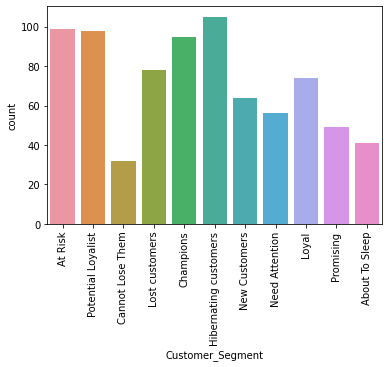

In [29]:
sns.countplot(x = 'Customer_Segment', data = df_customer)
plt.xticks(rotation=90)
plt.show()

In [30]:
df.groupby('Ship Mode')['Channel'].count()

Ship Mode
First Class       1386
Same Day           479
Second Class      1811
Standard Class    5518
Name: Channel, dtype: int64

In [31]:
df_customer_segment = df_customer[['Customer ID', 'Customer_Segment']]
df_customer_segment

,Customer ID,Customer_Segment
0,AA-10315,At Risk
1,AA-10375,Potential Loyalist
2,AA-10480,At Risk
3,AA-10645,Cannot Lose Them
4,AB-10015,Lost customers
...,...,...
786,XP-21865,Potential Loyalist
787,YC-21895,Promising
788,YS-21880,Need Attention
789,ZC-21910,Champions


In [32]:
df = pd.merge(df, df_customer_segment, on = 'Customer ID')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit,Returned,Customer_Segment
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.30,2,76.3945,0.0,56.5110,NaN,Loyal
1,3046,CA-2017-125290,2017-11-06,2017-11-10,Second Class,CC-12430,Home Office,55407,OFF-AR-10001216,13.90,5,2.0572,0.0,3.6140,NaN,Loyal
2,3047,CA-2017-125290,2017-11-06,2017-11-10,Second Class,CC-12430,Home Office,55407,OFF-PA-10003127,26.38,1,14.2452,0.0,12.1348,NaN,Loyal
3,6372,CA-2017-143035,2017-10-03,2017-10-05,Second Class,CC-12430,Home Office,10009,FUR-FU-10001934,83.92,4,15.5252,0.0,21.8192,NaN,Loyal
4,6373,CA-2017-143035,2017-10-03,2017-10-05,Second Class,CC-12430,Home Office,10009,OFF-AR-10001130,6.63,3,1.1713,0.0,3.1161,NaN,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9189,8695,US-2014-112795,2014-08-23,2014-08-28,Second Class,CR-12625,Home Office,49505,OFF-PA-10001934,19.44,3,3.3048,0.0,9.5256,NaN,Lost customers
9190,307,CA-2014-111003,2014-06-01,2014-06-06,Standard Class,CR-12625,Home Office,8701,OFF-BI-10001072,45.48,3,8.1864,0.0,20.9208,NaN,Lost customers
9191,308,CA-2014-111003,2014-06-01,2014-06-06,Standard Class,CR-12625,Home Office,8701,OFF-AR-10002135,289.20,6,34.2220,0.0,83.8680,NaN,Lost customers
9192,995,CA-2014-117639,2014-05-21,2014-05-25,Standard Class,MW-18235,Corporate,23464,OFF-BI-10003925,2715.93,7,205.6347,0.0,1276.4871,NaN,Cannot Lose Them


## Customer Segment and Sales

In [33]:
df_segment_sales = df[['Customer_Segment', 'Sales']]
df_segment_sales = df_segment_sales.groupby('Customer_Segment')['Sales'].sum().reset_index()
df_segment_sales

,Customer_Segment,Sales
0,About To Sleep,42160.5460
1,At Risk,424806.5844
2,Cannot Lose Them,111892.2166
3,Champions,494779.9908
4,Hibernating customers,126678.2004
5,Lost customers,48605.0898
6,Loyal,320749.4306
7,Need Attention,206201.2549
8,New Customers,41769.1768
9,Potential Loyalist,169700.1055


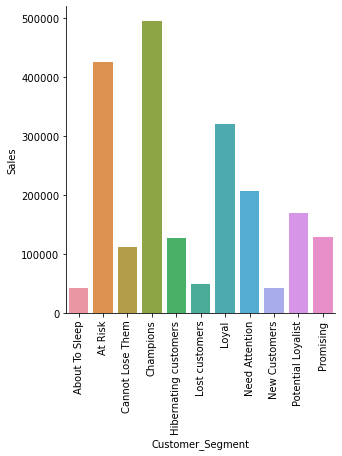

In [34]:
sns.catplot(x = 'Customer_Segment', y = 'Sales', data = df_segment_sales, kind = 'bar', ci = None)
plt.xticks(rotation=90)
plt.show()

## Customer Segment and Channel

In [35]:
# Check if each customer have unique channel
df_test = df[['Customer ID', 'Channel']]
df_test = df_test.groupby('Customer ID')['Channel'].nunique().reset_index()
df_test[df_test['Channel']!=1]

,Customer ID,Channel


<AxesSubplot:xlabel='Customer_Segment'>

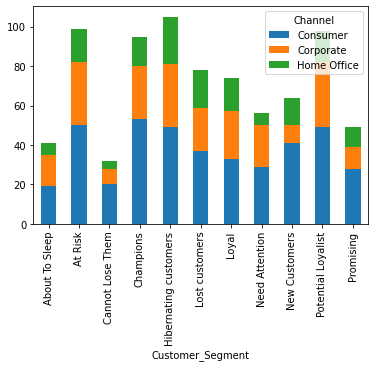

In [36]:
df_segment_channel = df[['Customer ID', 'Channel','Customer_Segment']].drop_duplicates()
df_segment_channel = df_segment_channel[['Channel','Customer_Segment']]
df_segment_channel_plot = df_segment_channel.groupby(['Channel','Customer_Segment']).size().reset_index().pivot(columns='Channel', index='Customer_Segment', values=0)
df_segment_channel_plot.plot(kind='bar', stacked=True)

## Customer Segment and Ship Mode

<AxesSubplot:xlabel='Customer_Segment'>

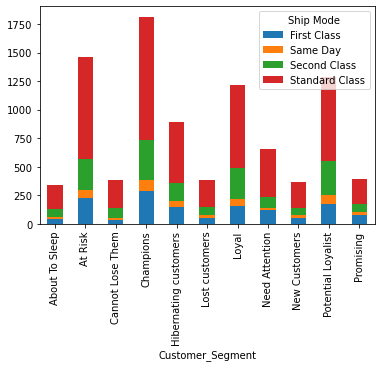

In [37]:
df_segment_shipmode = df[['Ship Mode','Customer_Segment']]
df_segment_shipmode_plot = df_segment_shipmode.groupby(['Ship Mode','Customer_Segment']).size().reset_index().pivot(columns='Ship Mode', index='Customer_Segment', values=0)
df_segment_shipmode_plot.plot(kind='bar', stacked=True)

In [38]:
df_segment_shipmode.groupby('Customer_Segment')['Customer_Segment'].count()

Customer_Segment
About To Sleep            339
At Risk                  1460
Cannot Lose Them          384
Champions                1814
Hibernating customers     893
Lost customers            381
Loyal                    1215
Need Attention            657
New Customers             365
Potential Loyalist       1289
Promising                 397
Name: Customer_Segment, dtype: int64

## Customer Segment and Category

In [39]:
df_product = pd.read_excel(xls, 'Product')
df_product.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [40]:
df_product

,Row ID,Product ID,Category,Sub-Category,Product Name
0,1,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,2,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,3,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,4,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,5,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...
1889,1890,TEC-PH-10002817,Technology,Phones,RCA ViSYS 25425RE1 Corded phone
1890,1891,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal
1891,1892,OFF-AP-10003099,Office Supplies,Appliances,"Eureka Hand Vacuum, Bagless"
1892,1893,TEC-PH-10002645,Technology,Phones,LG G2


In [41]:
df_product_category = df_product[['Product ID', 'Category']]
df_product_category['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [42]:
df_product_category = df_product_category.groupby('Product ID').agg(lambda x: '/'.join(set(x))).reset_index()
df_product_category

,Product ID,Category
0,FUR-BO-10000112,Furniture
1,FUR-BO-10000330,Furniture
2,FUR-BO-10000362,Furniture
3,FUR-BO-10000468,Furniture
4,FUR-BO-10000711,Furniture
...,...,...
1857,TEC-PH-10004912,Technology
1858,TEC-PH-10004922,Technology
1859,TEC-PH-10004924,Technology
1860,TEC-PH-10004959,Technology


In [43]:
df = pd.merge(df, df_product_category, on = 'Product ID')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Price,Discount,Profit,Returned,Customer_Segment,Category
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,0.0,56.5110,NaN,Loyal,Office Supplies
1,685,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Corporate,27217,OFF-AP-10002457,167.440,2,76.3945,0.2,14.6510,NaN,Promising,Office Supplies
2,4615,CA-2016-144540,2016-09-05,2016-09-10,Standard Class,GH-14410,Home Office,77070,OFF-AP-10002457,62.790,3,76.3945,0.8,-166.3935,NaN,Loyal,Office Supplies
3,6985,CA-2016-116526,2016-09-01,2016-09-05,Standard Class,JA-15970,Consumer,48227,OFF-AP-10002457,376.740,4,76.3945,0.1,71.1620,NaN,Loyal,Office Supplies
4,3638,CA-2016-145177,2016-11-10,2016-11-14,Standard Class,PP-18955,Home Office,45503,OFF-AP-10002457,334.880,4,76.3945,0.2,29.3020,NaN,Loyal,Office Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9189,9563,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Consumer,43055,TEC-MA-10003589,224.937,3,129.9636,0.7,-164.9538,NaN,Lost customers,Technology
9190,3841,CA-2014-126760,2014-07-26,2014-08-02,Standard Class,KM-16720,Consumer,89031,TEC-AC-10004814,170.970,3,33.6241,0.0,70.0977,NaN,Cannot Lose Them,Technology
9191,8925,CA-2016-168032,2016-01-30,2016-02-03,Standard Class,DF-13135,Consumer,61107,TEC-PH-10004241,1439.968,4,323.9928,0.2,143.9968,NaN,Cannot Lose Them,Technology
9192,4109,CA-2015-105599,2015-09-07,2015-09-07,Same Day,MC-17275,Consumer,10011,FUR-TA-10003837,27.414,3,13.8593,0.4,-14.1639,NaN,At Risk,Furniture


<AxesSubplot:xlabel='Customer_Segment'>

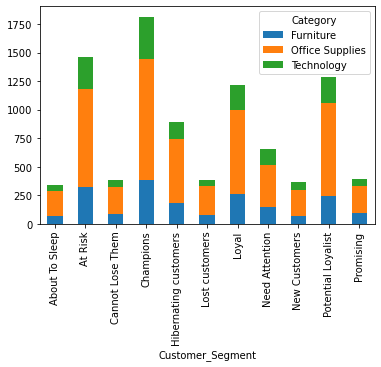

In [44]:
df_segment_category = df[['Customer_Segment', 'Category']]
df_segment_category_plot = df_segment_category.groupby(['Customer_Segment', 'Category']).size().reset_index().pivot(columns='Category', index='Customer_Segment', values=0)
df_segment_category_plot.plot(kind='bar', stacked=True)

# Task 6: Analyze the current situation of the company and make suggestions for the Marketing team

- Mặc dù công ty có một số nhóm khách hàng chất lượng có số lượng cao ví dụ như: Champions, Loyal, Potential Loyalist
- Một số nhóm khách hàng khác cần được tập trung quan tâm nhằm giảm số lượng ở những nhóm như: At Risk, Hibernating customers, Lost customers. Đặc biệt là nhóm khách hàng At Risk vì doanh thu của nhóm này mang lại rất cao
- Ở tất cả các customer segment: channel có số lượng sử dụng nhiều nhất là Consumer đến Corporate cuối cùng là Home Office
- Ship mode được sử dụng nhiều nhất là Standard Class và ít được sử dụng nhất là Same Day
- Loại sản phẩm được nhiều người mua nhất là office supplies
- Số lượng đơn hàng bị trả lại là không đáng kể ở tất cả customer segment

# Task 7: Which index should Marketing and Sales teams focus on?

In [45]:
df_product_unitprice = df[['Product ID', 'Unit Price']]
df_product_unitprice_sorted = df_product_unitprice.groupby('Product ID')['Unit Price'].max().reset_index().sort_values('Unit Price', ascending = False)
df_product_unitprice_sorted

,Product ID,Unit Price
1638,TEC-MA-10002412,4074.9264
1662,TEC-MA-10004125,2959.9926
1616,TEC-MA-10000418,2219.9926
1611,TEC-CO-10004722,1819.9948
1417,OFF-SU-10000151,1572.0288
...,...,...
905,OFF-FA-10000611,0.7696
903,OFF-FA-10000490,0.6572
909,OFF-FA-10000840,0.6042
1565,TEC-AC-10003709,0.5544


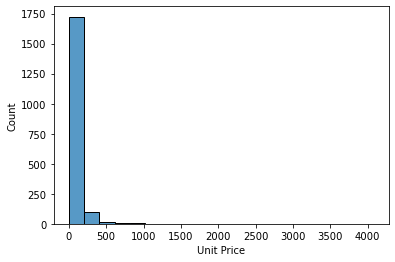

In [46]:
sns.histplot(x = 'Unit Price', data = df_product_unitprice_sorted, bins = 20)
plt.show()

In [47]:
df_product_unitprice_sorted.describe()

,Unit Price
count,1854.000000
mean,60.313628
std,172.595567
min,0.544500
25%,3.473600
50%,12.748000
75%,57.512100
max,4074.926400


- Công ty có rất nhiều sản phẩm nhưng phần lớn sản phẩm có giá thành rẻ dễ tiếp cận
- Nên tập trung vào chỉ số R và F thay vì M